Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. Дан набор фотографий людей с указанием возраста.

* Исследовательский анализ набора фотографий.
* Подготовить данные к обучению.
* Обучить нейронную сеть и рассчитать её качество.

## Исследовательский анализ данных

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
display(labels.info())
display(labels)
display(labels.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


* Данные представляют из всебя таблицу: 2 столбца, 7591 строк 
* Пропусков нет, что не может не радовать
* Цифры по возрасту вышлядят адекватно

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты не забываешь про первичный анализ загруженны файлов.
</div>

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

features, target = next(train_gen_flow)

print(features.shape)

Found 7591 validated image filenames.
(32, 224, 224, 3)


* 7591 - фотографий. Посмотрим на них поближе

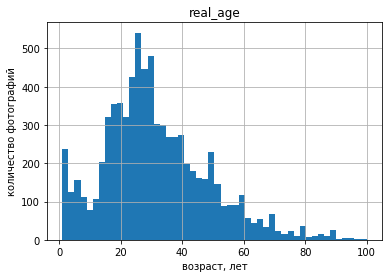

In [20]:
labels.hist('real_age', bins=50)

plt.xlabel('возраст, лет')
plt.ylabel('количество фотографий')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

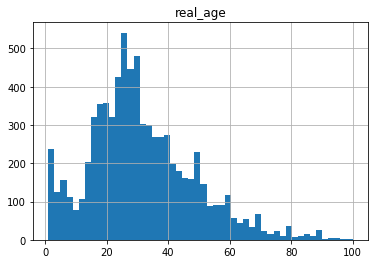

In [5]:
# выводим 15 изображений
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.title('возраст:'+str(target[i]))
    plt.tight_layout()

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно поработать над оформление графика (название осей и самого графика, а также размер).
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что в названиях изображений указан возраст!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Приветствую, Артем! Спсибо за комментарии. Добавил подписи
</div>

* Роспределение возраста похоже на Пуассоновское. Больше половины фотографий до 30 лет. Есть небольшая бимодальность (второй горб в области малышей)
* Есть чернобелые фото. Люди разного пола, рас, профиль/анфас, эмоционального состояния, в общем полное разнообразие
* На первый взгляд всё в порядке - возраст соответствует картинкам. Приступаем к обучению

<div class="alert alert-block alert-success">
<b>Успех:</b> Анализ првоеден хорошо.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
optimizer = Adam(lr=0.0001)
labels = pd.read_csv('/datasets/faces/labels.csv')
def load_train(path):

    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        horizontal_flip=True,
        seed=12345)
    return train_datagen_flow


def load_test(path):

    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255)
    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_datagen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

```

Train for 178 steps, validate for 119 steps
Epoch 1/5
2021-07-14 18:01:56.983451: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-07-14 18:01:57.264628: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 44s - loss: 268.8607 - mae: 11.4353 - val_loss: 690.5394 - val_mae: 21.2170
Epoch 2/5
178/178 - 36s - loss: 66.6749 - mae: 6.1404 - val_loss: 378.9721 - val_mae: 14.4896
Epoch 3/5
178/178 - 36s - loss: 34.4383 - mae: 4.4877 - val_loss: 239.8782 - val_mae: 11.0510
Epoch 4/5
178/178 - 36s - loss: 22.3842 - mae: 3.6514 - val_loss: 102.0491 - val_mae: 7.6995
Epoch 5/5
178/178 - 37s - loss: 14.8535 - mae: 3.0061 - val_loss: 79.3716 - val_mae: 6.6809
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 79.3716 - mae: 6.6809
Test MAE: 6.6809


```

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было добавить горизонтальный флип на тренировочной части. По сути это позволило бы увеличить выборку в 2 раза. Причем изображения полученные таким образом были бы неотличимы от настоящих.
</div>

## Анализ обученной модели

* Целевой показатель МАЕ меньше 8 лет достигнут на уровне 6,7 лет.
* Для этого использовалась сеть ResNet50 с GlobalAveragePooling2D, ф-я активации выходного слоя relu (чтобы отрицательных возрастов не было) и функцией ошибки MSE. 
* Оптимизатор Adam с недефолтной скоростью обучения - 0.0001
* Для достижения целевой МАЕ хватило 4 эпох (хотя по логу видно, что пятая эпоха всё еще значительно добавляет качества модели)
* Для увеличения точности можно проанализировать кросплоты, чтобы посмотерть по каким возрастам больше разлет. Также применить аугментацию. Ну и банально увеличить количество слоев. Но тут надо смотреть на время обучения

<div class="alert alert-block alert-success">
<b>Успех:</b> С технической точки зрения анализ проведен хорошо. Приятно видеть, что вывод хорошо структурирвоан.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Хороший совет! Действительно МАЕ равная 7 годам сможет помочь решить первую задачу - предложение товаров определенной возрастной категории. Но вот со второй задачей будет нехватать такой точности. Т.е. модель может завысить возраст. Но опять же надо более детально смотреть на сколько и на каких возрастных интервалах модель ошибается и в какую сторону.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Согласен!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Есть ещё вопрос, не относящийся в CV, но может хотя бы ссылку дашь:
    
    Задача из области физ-мата: дано несколько источников возмущения, которые определенным образом влияют друг на друга (это видно по параметрам работы источников). Причем значение имеет именно накопленное влияние. Цель задачи определить целевой параметр работы одного из источников, учитывая взимовлияние соседей. Нейронные сети мне показались наиболее подходящими здесь, т.к. на каждом слое я могу увязывать свои источники возмущения между собой. Может сталкивался с подобным и есть какие-то примеры решений подобных задач?
    
    Спасибо за ревью!
</div>

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> Эта задача чем-то похожа на метод потенциальных функций:
* https://habr.com/ru/post/208174/

Возможно, потребуется применить машинное обучение на графах:
* https://habr.com/ru/post/487138/

</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы